In [1]:
!pip install tensorflow keras sklearn matplotlib pandas pil

  Using cached sklearn-0.0.tar.gz (1.1 kB)


ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\k2h2j3'

In [5]:
cd/Users/k2h2j3/traffic/Train

C:\Users\k2h2j3\traffic\Train


In [6]:
os.getcwd()

'C:\\Users\\k2h2j3\\traffic\\Train'

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [11]:
train_data=pd.read_csv('C:\\Users\\k2h2j3\\traffic\\Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('C:\\Users\\k2h2j3\\traffic\\Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()




,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [12]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [13]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [14]:
cd/Users/k2h2j3/traffic

C:\Users\k2h2j3\traffic


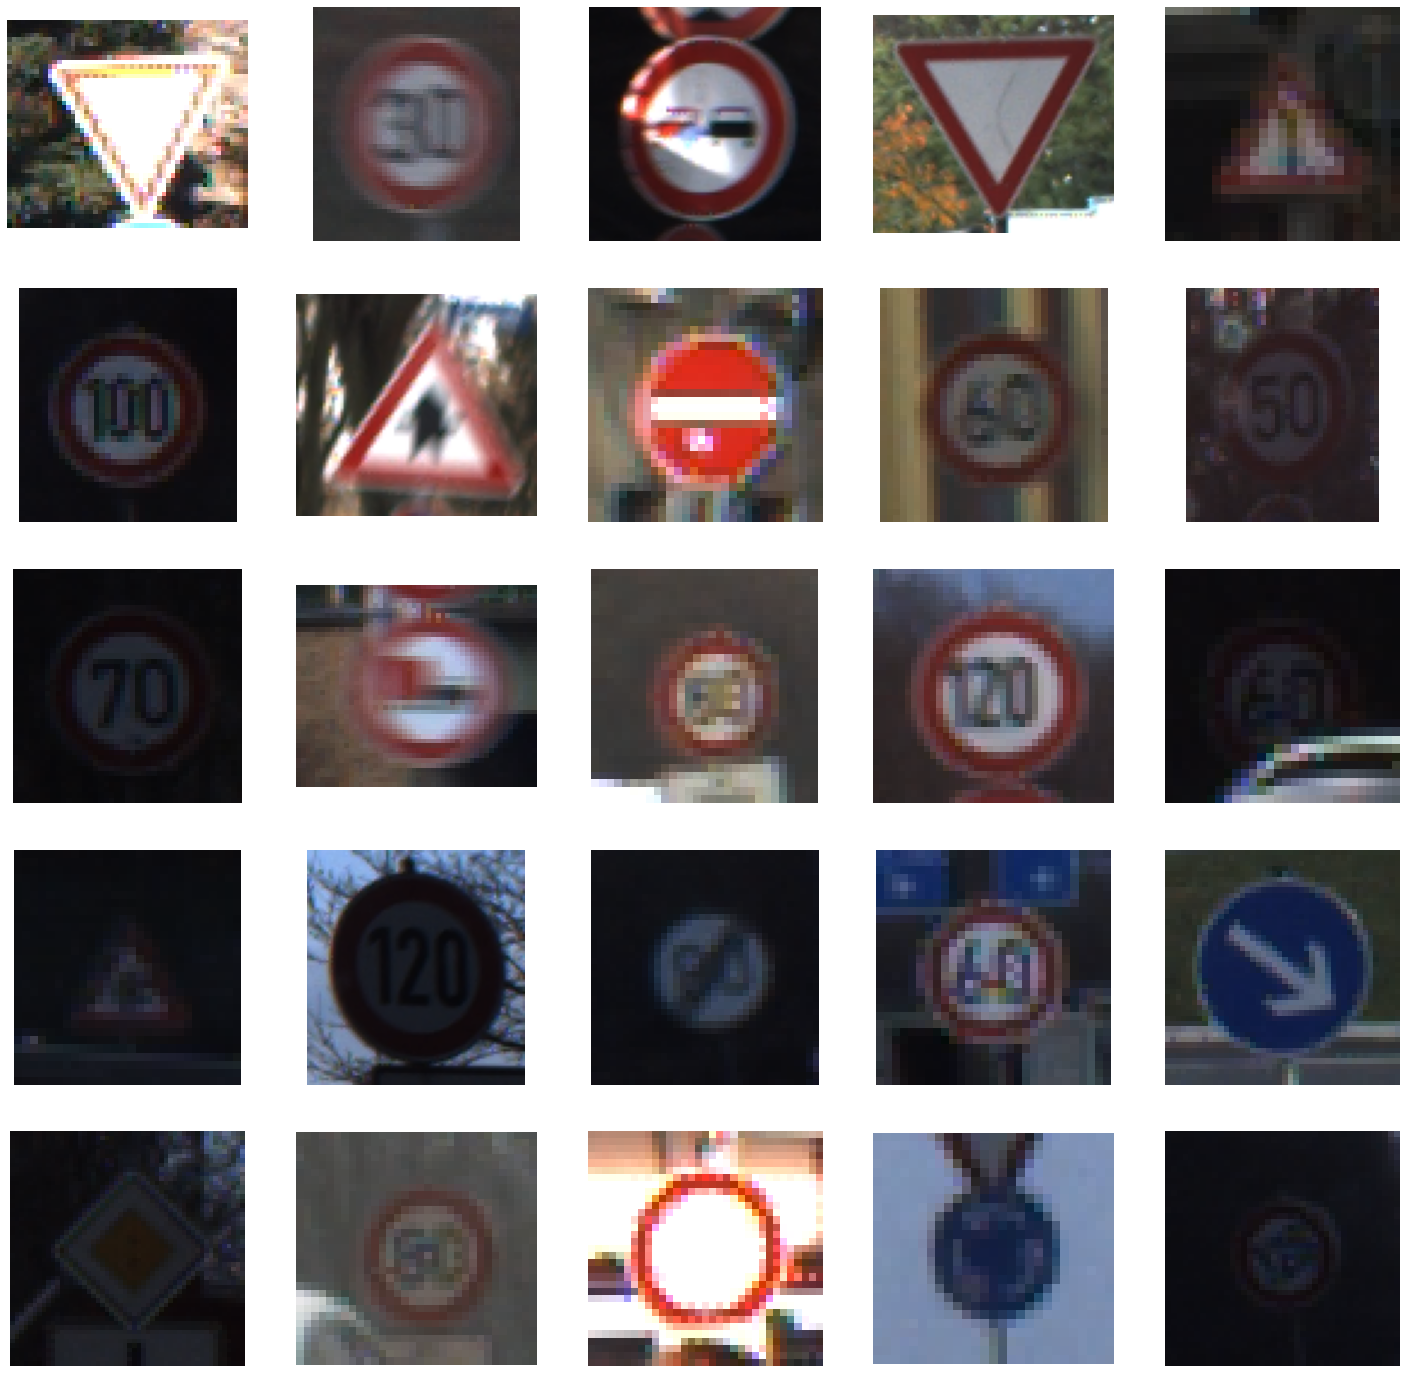

In [15]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [16]:
cd/Users/k2h2j3/traffic/Train

C:\Users\k2h2j3\traffic\Train


Text(0, 0.5, 'Number of images')

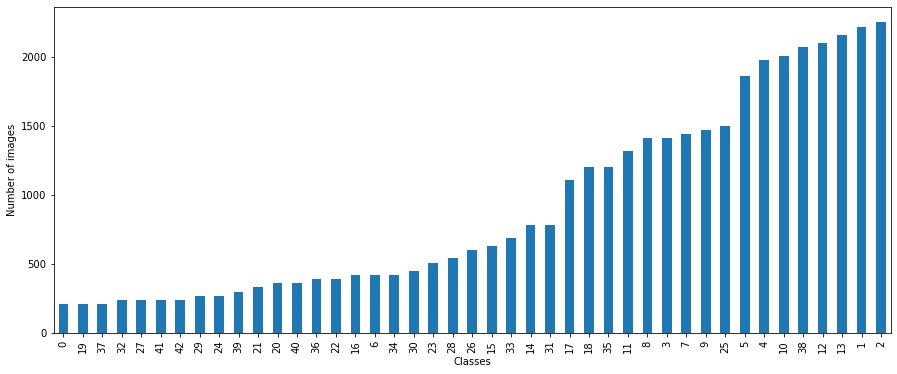

In [17]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [18]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [19]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 36s 73ms/step - loss: 2.3588 - accuracy: 0.4172 - val_loss: 0.9818 - val_accuracy: 0.7460
Epoch 2/20
491/491 [==============================] - 39s 79ms/step - loss: 0.9127 - accuracy: 0.7265 - val_loss: 0.2990 - val_accuracy: 0.9130
Epoch 3/20
491/491 [==============================] - 39s 79ms/step - loss: 0.5788 - accuracy: 0.8252 - val_loss: 0.2221 - val_accuracy: 0.9402
Epoch 4/20
491/491 [==============================] - 39s 79ms/step - loss: 0.4499 - accuracy: 0.8645 - val_loss: 0.1597 - val_accuracy: 0.9565
Epoch 5/20
491/491 [==============================] - 39s 79ms/step - loss: 0.3763 - accuracy: 0.8861 - val_loss: 0.1222 - val_accuracy: 0.9630
Epoch 6/20
491/491 [==============================] - 39s 80ms/step - loss: 0.3406 - accuracy: 0.8993 - val_loss: 0.0930 - val_accuracy: 0.9711
Epoch 7/20
491/491 [==============================] - 40s 81ms/step - loss: 0.2792 - accuracy: 0.9164 - val_loss: 0.0795 - val_accuracy:

In [20]:
model.save('traffic_classifier.h5')

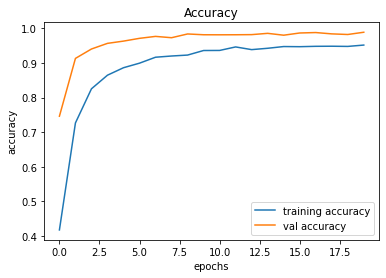

In [21]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

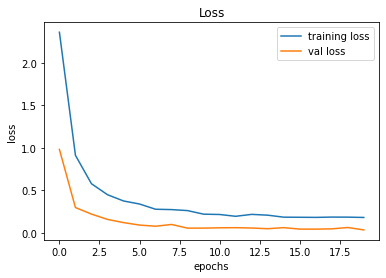

In [22]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
from IPython.display import Image
from matplotlib.image import imread

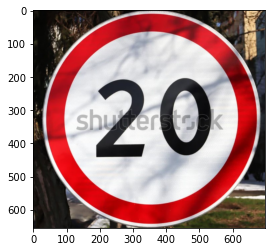

In [28]:
img = imread("C:/aiproject/20secd.jpg")
plt.imshow(img)

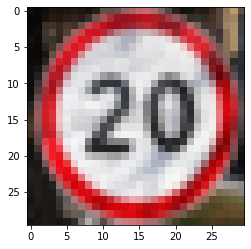

In [29]:
from skimage.transform import resize
resizeimg = resize(img,(30,30,3))
plt.imshow(resizeimg)

In [30]:
predictions = model.predict(np.array([resizeimg]))

predictions

array([[1.8130778e-06, 2.7432732e-02, 1.7610727e-03, 2.4958546e-03,
        1.8806463e-04, 2.4868629e-03, 1.7571461e-04, 2.1196047e-05,
        2.4618136e-04, 1.1897068e-03, 3.9198108e-05, 4.4202167e-03,
        2.5435474e-03, 1.1864516e-02, 5.8925793e-06, 1.9704981e-04,
        3.5132267e-05, 1.7999636e-04, 6.6987038e-01, 1.6966308e-04,
        2.3083279e-02, 8.6755969e-04, 1.9016456e-05, 6.2159187e-04,
        4.1303218e-05, 5.8309983e-02, 5.0962726e-03, 1.1951499e-05,
        4.8228754e-05, 3.1902321e-04, 7.0329261e-04, 9.6410010e-03,
        1.1870258e-01, 1.9688602e-04, 1.8629500e-05, 1.4754987e-03,
        7.9866741e-03, 4.6567440e-08, 3.8367249e-02, 3.2666881e-06,
        8.9586806e-03, 1.6000295e-04, 4.3191132e-05]], dtype=float32)

In [31]:
result = np.argmax(predictions[0])
if result == 0:
    print("20")
elif result == 1:
    print("30")
elif result == 2:
    print("50")
elif result == 3:
    print("60")
elif result == 4:
    print("70")
elif result == 5:
    print("80")
elif result == 6:
    print("80x")
elif result == 7:
    print("100")
elif result == 8:
    print("120")
elif result == 9:
    print("소형")
elif result == 10:
    print("대형")
elif result == 11:
    print("공동묘지")
elif result == 12:
    print("노랑")
elif result == 13:
    print("빈삼각형")
elif result == 14:
    print("정지")
elif result == 15:
    print("가능")
elif result == 16:
    print("화물")
elif result == 17:
    print("일시정지")
elif result == 18:
    print("위험")
elif result == 19:
    print("왼쪽")
elif result == 20:
    print("오른쪽")
elif result == 21:
    print("굴곡선")
elif result == 22:
    print("비포장")
elif result == 23:
    print("미끄럼")
elif result == 24:
    print("갓길")
elif result == 4:
    print("공사중")
elif result == 25:
    print("신호구간")
elif result == 26:
    print("보행자도로")
elif result == 27:
    print("난입")
elif result == 28:
    print("자전거도로")
elif result == 29:
    print("눈길")
elif result == 30:
    print("동물출현")
elif result == 31:
    print("금지")
elif result == 32:
    print("오")
elif result == 33:
    print("왼")
elif result == 34:
    print("직진")
elif result == 35:
    print("직오")
elif result == 36:
    print("직왼")
elif result == 37:
    print("5시")
elif result == 38:
    print("7시")
elif result == 39:
    print("회전")
elif result == 40:
    print("소형중지")
elif result == 41:
    print("대형중지")
else:
    print("답이없습니다")

위험
